In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
file_path = 'produksiPadi.xlsx'
data = pd.ExcelFile(file_path)

df = data.parse('data training')

df_cleaned = df[['Tahun', 'Produksi Padi(Ton)']].dropna()

Deskripsi Statistik Dataset:
             Tahun  Produksi Padi(Ton)
count    53.000000        5.300000e+01
mean   1996.000000        4.694139e+07
std      15.443445        1.632983e+07
min    1970.000000        1.869365e+07
25%    1983.000000        3.530311e+07
50%    1996.000000        4.937705e+07
75%    2009.000000        5.460403e+07
max    2022.000000        8.114862e+07


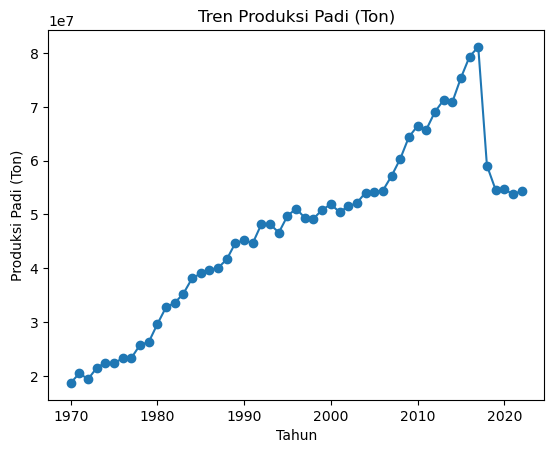

In [7]:
print("Deskripsi Statistik Dataset:")
print(df_cleaned.describe())

plt.plot(df_cleaned['Tahun'], df_cleaned['Produksi Padi(Ton)'], marker='o')
plt.title('Tren Produksi Padi (Ton)')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.show()

In [9]:
X = df_cleaned[['Tahun']]
y = df_cleaned['Produksi Padi(Ton)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): 919791.223012648
Model Intercept: -1788935664.2799673


In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 42542944649817.42
R-squared (R²): 0.8719873653065402


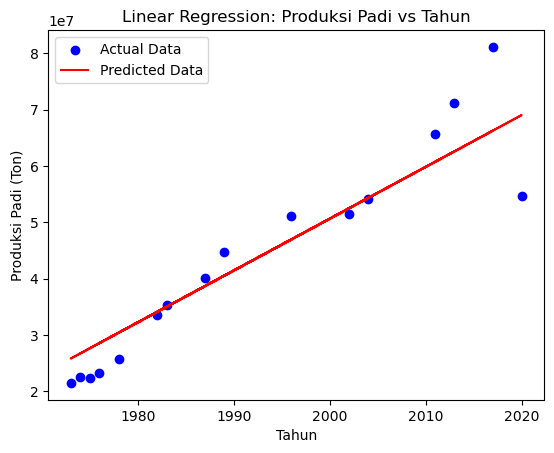

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Data')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.title('Linear Regression: Produksi Padi vs Tahun')
plt.legend()
plt.show()

In [17]:
# Future years to predict
future_years = pd.DataFrame({'Tahun': [2025, 2030, 2035, 2040]})

# Predict future production
future_predictions = model.predict(future_years)

# Combine future years with predictions
future_results = pd.DataFrame({
    'Tahun': future_years['Tahun'],
    'Prediksi Produksi Padi (Ton)': future_predictions
})

# Display predictions for future years
print("Prediksi Produksi Padi untuk Tahun Mendatang:")
print(future_results)

# Optional: Save predictions to Excel
future_results.to_excel('prediksi_produksi_padi.xlsx', index=False)

Prediksi Produksi Padi untuk Tahun Mendatang:
   Tahun  Prediksi Produksi Padi (Ton)
0   2025                  7.364156e+07
1   2030                  7.824052e+07
2   2035                  8.283947e+07
3   2040                  8.743843e+07
